In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

dataset = pd.read_csv("dataset.csv")

In [436]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)


In [448]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

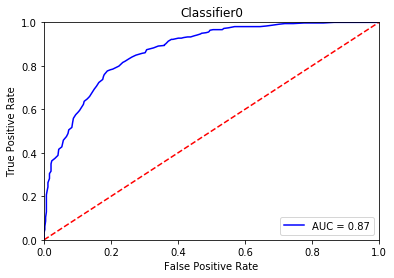

In [471]:
rf0 = RandomForestClassifier()
rf0.fit(xtrain,ytrain)
y_pred0=rf0.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier0')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [472]:
import math
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [496]:
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=0)
kfold = StratifiedKFold(n_splits=10, shuffle = True,random_state=0)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=kfold, verbose=2,refit=True,n_jobs=-1,scoring='roc_auc',random_state=0)
rf_random.fit(xtrain, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 18.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [497]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

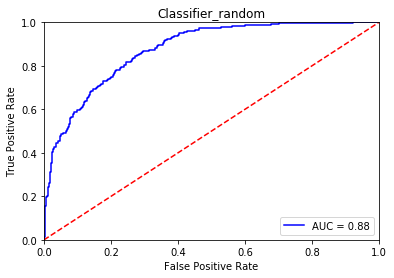

In [507]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

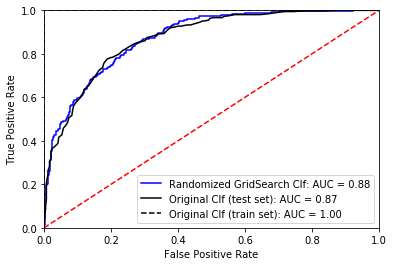

In [508]:
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Randomized GridSearch Clf: AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k', label = 'Original Clf (test set): AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytrain, rf0.predict_proba(xtrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'Original Clf (train set): AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [509]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred1)
print ("Original Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Original Accuracy: ", accuracy_score(ytest, y_pred0))
from sklearn.metrics import precision_score, recall_score, f1_score
print ('Original Precision:',precision_score(ytest,y_pred0))
print ('Original recall:',recall_score(ytest,y_pred0))
print ('Original f1:',f1_score(ytest,y_pred0))

Original Confusion Matrix: 
 [[227 207]
 [205 153]]
Original Accuracy:  0.7878787878787878
Original Precision: 0.7411167512690355
Original recall: 0.8156424581005587
Original f1: 0.776595744680851


In [510]:
rgrid_pred=rf_random.predict(xtest)
cm1 = confusion_matrix(ytest,rgrid_pred)
print ("Randomized GSCV Confusion Matrix: \n", cm1)
print ("Randomized GSCV Accuracy: ", accuracy_score(ytest, rgrid_pred))
print ('Randomized GSCV Precision:',precision_score(ytest, rgrid_pred))
print ('Randomized GSCV Recall:',recall_score(ytest, rgrid_pred))
print ('Randomized GSCV f1:',f1_score(ytest,rgrid_pred))

Randomized GSCV Confusion Matrix: 
 [[325 109]
 [ 66 292]]
Randomized GSCV Accuracy:  0.7790404040404041
Randomized GSCV Precision: 0.7281795511221946
Randomized GSCV Recall: 0.8156424581005587
Randomized GSCV f1: 0.769433465085639


In [511]:

threshold = 0.7
y_pred4_proba=rf_random.predict_proba(xtest)
y_pred4 = (y_pred4_proba[:,1]>=threshold).astype('int')


In [512]:
print ("Randomized GSCV Accuracy (threshold=0.7): ", accuracy_score(ytest, y_pred4))
print ('Randomized GSCV Precision (threshold=0.7):',precision_score(ytest, y_pred4))
print ('Randomized GSCV Recall (threshold=0.7):',recall_score(ytest, y_pred4))
print ('Randomized GSCV f1 (threshold=0.7):',f1_score(ytest,y_pred4))

Randomized GSCV Accuracy (threshold=0.7):  0.7575757575757576
Randomized GSCV Precision (threshold=0.7): 0.8458333333333333
Randomized GSCV Recall (threshold=0.7): 0.5670391061452514
Randomized GSCV f1 (threshold=0.7): 0.6789297658862876


In [504]:
instance=dataset.iloc[3900:3901,0:23]
prediction, bias, contributions = ti.predict(rf3, instance)
print ('Prediction', prediction)
print ('Bias (trainset prior)', bias)
print ('Feature contributions:')
for c, feature in zip(contributions[0], features):
    print (feature, c)

Prediction [[0.9064881 0.0935119]]
Bias (trainset prior) [[0.54407583 0.45592417]]
Feature contributions:
creatinine [ 0.03246801 -0.03246801]
po2 [ 0.0094408 -0.0094408]
fio2 [ 0.11906199 -0.11906199]
pco2 [ 0.01907375 -0.01907375]
bp_min [ 0.00556379 -0.00556379]
bp_max [-0.00136127  0.00136127]
pain [ 0.00096451 -0.00096451]
k [ 0.01207404 -0.01207404]
hr_min [-0.00835198  0.00835198]
hr_max [-0.04835115  0.04835115]
gcs_min [ 0.00854173 -0.00854173]
gcs_max [-0.00516103  0.00516103]
bun [ 0.071795 -0.071795]
hco3 [ 0.01563997 -0.01563997]
airway [-0.08063636  0.08063636]
resp_min [ 0.00129615 -0.00129615]
resp_max [ 0.05839645 -0.05839645]
haemoglobin [ 0.0756256 -0.0756256]
spo2_min [ 0.03278237 -0.03278237]
spo2_max [ 0.01344905 -0.01344905]
temp_min [ 0.01421731 -0.01421731]
temp_max [ 0.00590178 -0.00590178]
na [ 0.00998174 -0.00998174]


In [516]:
target=ytest.to_numpy()
target.shape

(792,)

In [517]:
target_2d=target.reshape(792,1)

In [519]:
np.unique(target)

array([0, 1])

In [520]:
import fatf
import fatf.utils.data.tools as fatf_data_tools
from pprint import pprint
target_grouping_num = fatf_data_tools.group_by_column(target_2d, 0)

20-Jul-20 16:13:37 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [521]:
target_grouping_num[1]

['x <= 0.2',
 '0.2 < x <= 0.4',
 '0.4 < x <= 0.6000000000000001',
 '0.6000000000000001 < x <= 0.8',
 '0.8 < x']

In [522]:
target_grouping_num_cat = fatf_data_tools.group_by_column(target_2d, 0, treat_as_categorical=True)
target_grouping_num_cat[1]

['(0,)', '(1,)']

In [523]:
target_grouping_num_cat[0][0]

[0,
 2,
 3,
 5,
 7,
 9,
 12,
 14,
 15,
 19,
 21,
 25,
 27,
 28,
 30,
 31,
 32,
 34,
 35,
 37,
 38,
 41,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 57,
 58,
 59,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 72,
 73,
 74,
 79,
 80,
 81,
 82,
 83,
 87,
 88,
 89,
 91,
 93,
 94,
 95,
 97,
 99,
 101,
 104,
 105,
 106,
 107,
 108,
 109,
 114,
 115,
 116,
 120,
 121,
 123,
 124,
 125,
 126,
 128,
 129,
 132,
 133,
 134,
 135,
 136,
 139,
 140,
 141,
 143,
 145,
 148,
 149,
 150,
 151,
 152,
 153,
 157,
 158,
 159,
 160,
 163,
 164,
 167,
 168,
 169,
 170,
 173,
 174,
 177,
 180,
 181,
 183,
 185,
 186,
 187,
 189,
 190,
 191,
 193,
 195,
 196,
 197,
 198,
 203,
 204,
 205,
 206,
 208,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 226,
 227,
 229,
 231,
 232,
 233,
 237,
 238,
 239,
 241,
 243,
 244,
 246,
 248,
 251,
 252,
 254,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 266,
 267,
 269,
 270,
 272,
 274,
 275,
 277,
 278,
 282,
 283,
 285,
 286,
 287,
 289,
 292,
 295,
 

In [524]:
target_grouping_num_cat[0][1]

[1,
 4,
 6,
 8,
 10,
 11,
 13,
 16,
 17,
 18,
 20,
 22,
 23,
 24,
 26,
 29,
 33,
 36,
 39,
 40,
 42,
 43,
 44,
 45,
 53,
 55,
 56,
 60,
 62,
 69,
 70,
 71,
 75,
 76,
 77,
 78,
 84,
 85,
 86,
 90,
 92,
 96,
 98,
 100,
 102,
 103,
 110,
 111,
 112,
 113,
 117,
 118,
 119,
 122,
 127,
 130,
 131,
 137,
 138,
 142,
 144,
 146,
 147,
 154,
 155,
 156,
 161,
 162,
 165,
 166,
 171,
 172,
 175,
 176,
 178,
 179,
 182,
 184,
 188,
 192,
 194,
 199,
 200,
 201,
 202,
 207,
 209,
 210,
 218,
 222,
 225,
 228,
 230,
 234,
 235,
 236,
 240,
 242,
 245,
 247,
 249,
 250,
 253,
 255,
 256,
 264,
 268,
 271,
 273,
 276,
 279,
 280,
 281,
 284,
 288,
 290,
 291,
 293,
 294,
 296,
 298,
 299,
 303,
 305,
 306,
 307,
 310,
 313,
 314,
 316,
 317,
 320,
 322,
 323,
 326,
 328,
 329,
 330,
 335,
 338,
 343,
 344,
 345,
 348,
 354,
 355,
 356,
 357,
 361,
 362,
 363,
 365,
 366,
 367,
 373,
 374,
 376,
 377,
 379,
 385,
 386,
 387,
 391,
 395,
 397,
 398,
 401,
 404,
 405,
 407,
 408,
 410,
 412,
 414,
 41

In [525]:
creatinine_index=0
import fatf.transparency.data.describe_functions as fatf_describe_data
creatinine_desc=fatf_describe_data.describe_array(dataset.iloc[:, 0].to_numpy())
pprint(creatinine_desc)

{'25%': 54.0,
 '50%': 70.0,
 '75%': 92.0,
 'count': 3957,
 'max': 988.0,
 'mean': 89.21929375639712,
 'min': 11.0,
 'nan_count': 0,
 'std': 72.88558556797253}


In [526]:
creatinine_class0 = dataset.iloc[target_grouping_num_cat[0][0],creatinine_index].to_numpy()
creatinine_class0_desc = fatf_describe_data.describe_array(creatinine_class0)
pprint(creatinine_class0_desc)

{'25%': 53.0,
 '50%': 69.5,
 '75%': 89.0,
 'count': 434,
 'max': 641.0,
 'mean': 81.72883816253082,
 'min': 18.0,
 'nan_count': 0,
 'std': 56.25120168178726}


In [527]:
creatinine_class1 = dataset.iloc[target_grouping_num_cat[0][1],creatinine_index].to_numpy()
creatinine_class1_desc = fatf_describe_data.describe_array(creatinine_class1)
pprint(creatinine_class1_desc)

{'25%': 56.0,
 '50%': 66.0,
 '75%': 86.75,
 'count': 358,
 'max': 675.0,
 'mean': 82.32831021311391,
 'min': 13.0,
 'nan_count': 0,
 'std': 60.38029478632298}


In [528]:
test_data=np.column_stack((xtest,ytest))

In [537]:
creatinine_groups=[59,82]
creatinine_grouping=fatf_data_tools.group_by_column(test_data, creatinine_index, groupings=creatinine_groups)
creatinine_grouping[1]

['x <= 59', '59 < x <= 82', '82 < x']

In [538]:
len(creatinine_grouping[0][0])

269

In [539]:
len(creatinine_grouping[0][1])

265

In [540]:
len(creatinine_grouping[0][2])

258

In [541]:
import fatf.accountability.data.measures as fatf_accountability_data
counts_per_grouping = [len(i) for i in creatinine_grouping[0]]
fatf_accountability_data.sampling_bias_grid_check(counts_per_grouping)

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [543]:
import fatf.utils.metrics.tools as fatf_metrics_tools
target_grid=ytest.to_numpy()
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(creatinine_grouping[0], target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())

In [544]:
import fatf.utils.metrics.metrics as fatf_metrics
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_0_acc

0.7657992565055762

In [545]:
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_1_acc

0.8113207547169812

In [546]:
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
group_2_acc

0.7596899224806202

In [547]:
import fatf.accountability.models.measures as fatf_accountability_models

fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [580]:
import fatf.utils.data.tools as fatf_data_tools
airway_index=14
airway_grouping = fatf_data_tools.group_by_column(dataset.to_numpy(), airway_index,treat_as_categorical=True)
airway_grouping[1]

['(0.0,)', '(1.0,)']

In [582]:
airway_target0 = y[airway_grouping[0][0]]
airway_target0_counts = np.unique(airway_target0, return_counts=True)
airway_target0_counts

(array([0, 1]), array([1048, 1717]))

In [583]:
airway_target1 = y[airway_grouping[0][1]]
airway_target1_counts = np.unique(airway_target1, return_counts=True)
airway_target1_counts

(array([0, 1]), array([1108,   84]))

In [584]:
no_airway_fail_ratio = airway_target0_counts[1][0]/airway_target0_counts[1].sum()
no_airway_fail_ratio

0.3790235081374322

In [585]:
with_airway_fail_ratio = airway_target1_counts[1][0]/airway_target1_counts[1].sum()
with_airway_fail_ratio

0.9295302013422819

In [589]:
predictions=rf_random.predict(x)
cm2 = confusion_matrix(y,predictions)
print ("Randomized GSCV Confusion Matrix: \n", cm2)
print ("Randomized GSCV Accuracy(whole dataset): ", accuracy_score(y, predictions))

Randomized GSCV Confusion Matrix: 
 [[2042  114]
 [  93 1708]]
Randomized GSCV Accuracy(whole dataset):  0.9476876421531463


In [591]:
import fatf.utils.metrics.tools as fatf_metric_tools
import fatf.utils.metrics.metrics as fatf_performance_metrics

airway_cm = fatf_metric_tools.confusion_matrix_per_subgroup_indexed(airway_grouping[0],y.to_numpy(),predictions,labels=np.unique(y.to_numpy()).tolist())

In [592]:
fatf_performance_metrics.accuracy(airway_cm[0])

0.9392405063291139

In [593]:
fatf_performance_metrics.accuracy(airway_cm[1])

0.9672818791946308

In [594]:
import fatf.fairness.models.measures as fatf_fairness_models
airway_equal_accuracy = fatf_fairness_models.equal_accuracy(airway_cm)
fatf_fairness_models.disparate_impact_check(airway_equal_accuracy)

False

In [595]:
airway_equal_opportunity = fatf_fairness_models.equal_opportunity(airway_cm)
>>> fatf_fairness_models.disparate_impact_check(airway_equal_opportunity)

False

In [596]:
airway_demographic_parity = fatf_fairness_models.demographic_parity(airway_cm)
fatf_fairness_models.disparate_impact_check(airway_demographic_parity)

False